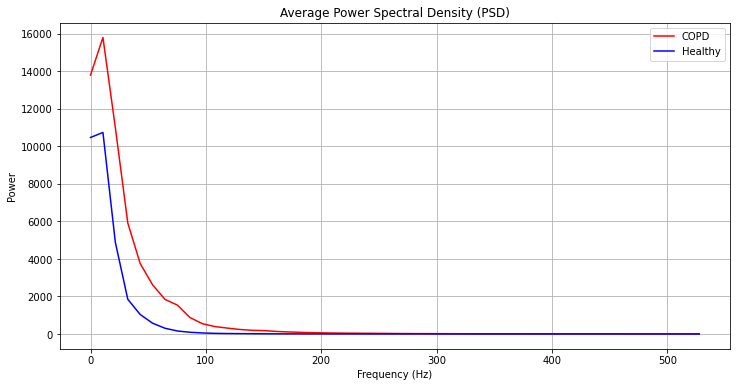

In [9]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt


data_dir = "./Standardized_Data/training/"  

def compute_psd(file_path):
    y, sr = librosa.load(file_path, sr=None)
    psd = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))**2
    psd_avg = np.mean(psd, axis=1)
    return psd_avg

psd_copd, psd_healthy = [], []
classes = {"COPD": 0, "Healthy": 1}

for label, class_num in classes.items():
    folder = os.path.join(data_dir, label)
    for file_name in os.listdir(folder):
        if file_name.endswith(".wav"):
            file_path = os.path.join(folder, file_name)
            psd_avg = compute_psd(file_path)
            if class_num == 0:
                psd_copd.append(psd_avg)
            else:
                psd_healthy.append(psd_avg)

psd_copd_avg = np.mean(np.array(psd_copd), axis=0)
psd_healthy_avg = np.mean(np.array(psd_healthy), axis=0)
freqs = librosa.fft_frequencies(sr=22050, n_fft=2048)

plt.figure(figsize=(12, 6))
plt.plot(freqs[:50], psd_copd_avg[:50], label="COPD", color="red")
plt.plot(freqs[:50], psd_healthy_avg[:50], label="Healthy", color="blue")
plt.title("Average Power Spectral Density (PSD)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()


1025

C:\Users\saee0002\Anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\saee0002\Anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


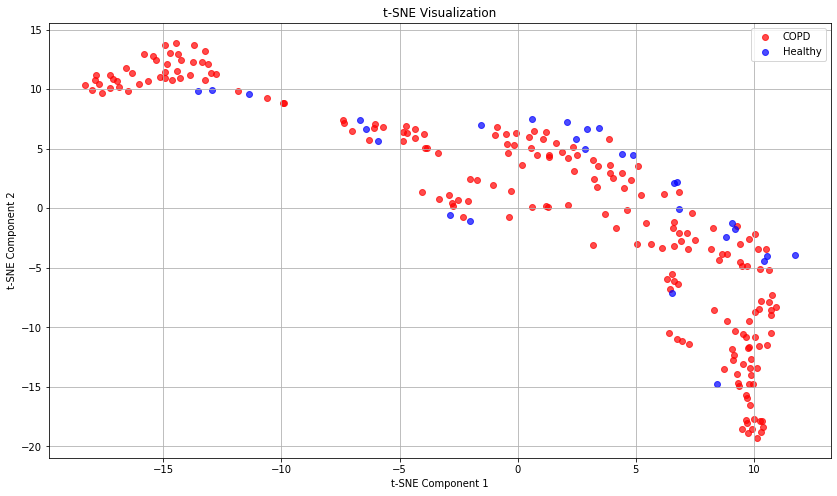

In [11]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data_dir = "./Standardized_Data/training/"   

def compute_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y = librosa.util.normalize(y)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    features = np.hstack((
        np.mean(rms), np.mean(spec_cent), np.mean(spec_bw),
        np.mean(rolloff), np.mean(zcr), np.mean(mfcc, axis=1)
    ))
    return features

X, y = [], []
classes = {"COPD": 0, "Healthy": 1}

for label, class_num in classes.items():
    folder = os.path.join(data_dir, label)
    for file_name in os.listdir(folder):
        if file_name.endswith(".wav"):
            file_path = os.path.join(folder, file_name)
            features = compute_features(file_path)
            X.append(features)
            y.append(class_num)

X = np.array(X)
y = np.array(y)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(14, 8))
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label="COPD", color="red", alpha=0.7)
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label="Healthy", color="blue", alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid()
plt.show()
